In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


# ibm_brisbane Experiment with 30 to 100 qubits

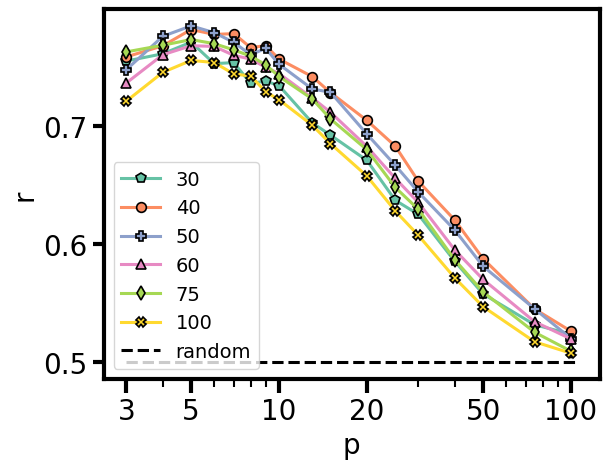

In [2]:
nqs = [30,40,50,60,75,100]
backend_name = "ibm_brisbane"
results_brisbane = {nq:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for nq in nqs}

delta = 1
colors = plt.get_cmap("Set2")
fig, ax = plt.subplots()
markers = {30:"p", 40:"o", 50:"P", 60:"^", 75:"d", 100:"X"}
for nn, nq in enumerate(results_brisbane.keys()):
    res_nq = results_brisbane[nq]["postprocessing"]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = f"{nq}", marker=markers[nq], markeredgecolor="black", color=colors(nn), markersize=7)
ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")

ax.legend()
ax.set_xscale("log")
ps = [3,5,10,20,50,100]
ax.set_xticks(ps)
ax.set_xticklabels(ps);


# Eagle and Heron QPUs comparative results

ibm_boston 0.8408723076923076
ibm_marrakesh 0.7725692307692306
ibm_fez 0.776613846153846
ibm_torino-v1 0.7602323076923075
ibm_torino-v0 0.7282861538461537
ibm_brisbane 0.7560153846153844
ibm_sherbrooke 0.7209246153846152
ibm_kyiv 0.7232769230769228
ibm_nazca 0.6727430769230768
ibm_kyoto 0.6615830769230767
ibm_osaka 0.6745399999999998
ibm_brussels 0.7191769230769229
ibm_strasbourg 0.7109923076923075
TN 0.9778938461538461


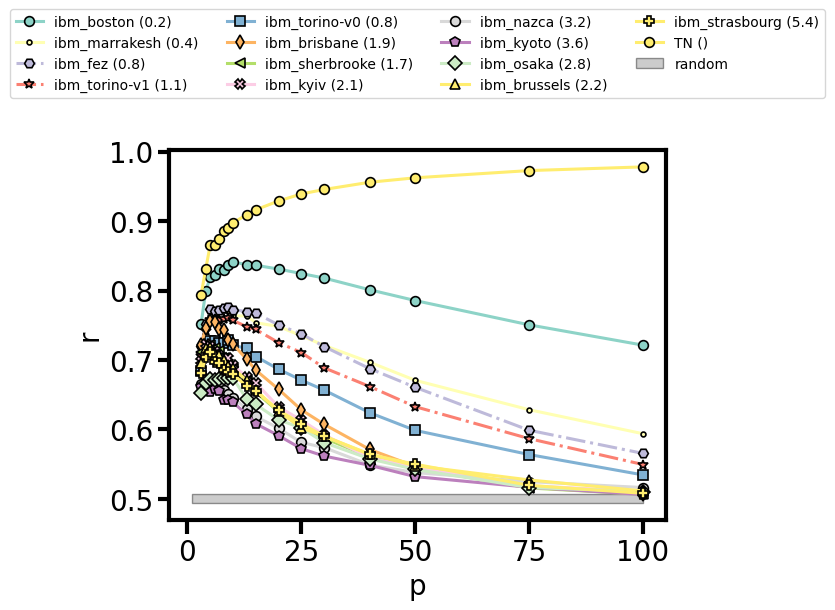

In [4]:
names = ["ibm_marrakesh","ibm_brisbane", "ibm_torino", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_fez", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}
results["ibm_torino-v1"]  = np.load(f"./Data/ibm_torino/100_1D_v1.npy", allow_pickle=True).item()
results["ibm_torino-v0"] = results["ibm_torino"]
results["ibm_boston"]  = np.load(f"./Data/ibm_boston/100_1D.npy", allow_pickle=True).item()

results["TN"] = np.load(f"./Data/TN/100_1D_2.npy", allow_pickle=True).item()

fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
names = ["ibm_boston", "ibm_marrakesh", "ibm_fez", "ibm_torino-v1","ibm_torino-v0", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg", "TN"]
colors = plt.get_cmap("Set3")
EPLG = {"ibm_marrakesh":" (0.4)", "ibm_torino-v1":" (1.1)", "ibm_torino-v0":" (0.8)", "ibm_brisbane":" (1.9)", "ibm_sherbrooke":" (1.7)", "ibm_kyiv":" (2.1)", "ibm_osaka":" (2.8)",
         "ibm_nazca":" (3.2)", "ibm_kyoto":" (3.6)", "ibm_kyiv":" (2.1)", "ibm_fez":" (0.8)", "ibm_brussels":" (2.2)", "ibm_strasbourg":" (5.4)", "TN": " ()", "ibm_boston":" (0.2)"}
markers = {"ibm_boston":"o", "ibm_marrakesh":".","ibm_torino-v0":"s", "ibm_torino-v1":"*", "ibm_fez":"H", "ibm_brussels":"^", "ibm_brisbane":"d", "ibm_kyoto":"p", "ibm_nazca":"o", "ibm_kyiv":"X", "random":".", "ibm_strasbourg":"P", "H2-1":">", "ibm_sherbrooke":"<", "ibm_osaka":"D", "TN":"o"}


for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    if backend_name == "ibm_fez":
        dt = 68e-3
    elif backend_name == "ibm_torino":
        dt = 86e-3
    else:
        dt = 660e-3
    # ax.plot(2*np.array(ps)*dt, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")
    ax.plot(ps, rs, label=backend_name + EPLG[backend_name], markersize=7, markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez", "ibm_torino-v1"] else "-", marker=markers[backend_name])
    print(backend_name, max(rs))
rand_data = res_random["results"][:,1]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 100], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([0,100], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.legend(fontsize=11)
ax.set_ylabel("r")
# ax.set_xlabel(r"dt [$\mu s$]")
ax.set_xlabel("p")
# ax.set_xscale("log")
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.4), ncol=4, fontsize=10)

# fig.savefig(f"./Figures/1D-Chain/comparison_100q_{case}_dt.pdf", bbox_inches="tight", transparent=True)


ibm_marrakesh 0.7725692307692306
ibm_fez 0.776613846153846
ibm_torino-v1 0.7602323076923075
ibm_torino-v0 0.7282861538461537
ibm_brisbane 0.7560153846153844
ibm_sherbrooke 0.7209246153846152
ibm_kyiv 0.7232769230769228
ibm_nazca 0.6727430769230768
ibm_kyoto 0.6615830769230767
ibm_osaka 0.6745399999999998
ibm_brussels 0.7191769230769229
ibm_strasbourg 0.7109923076923075


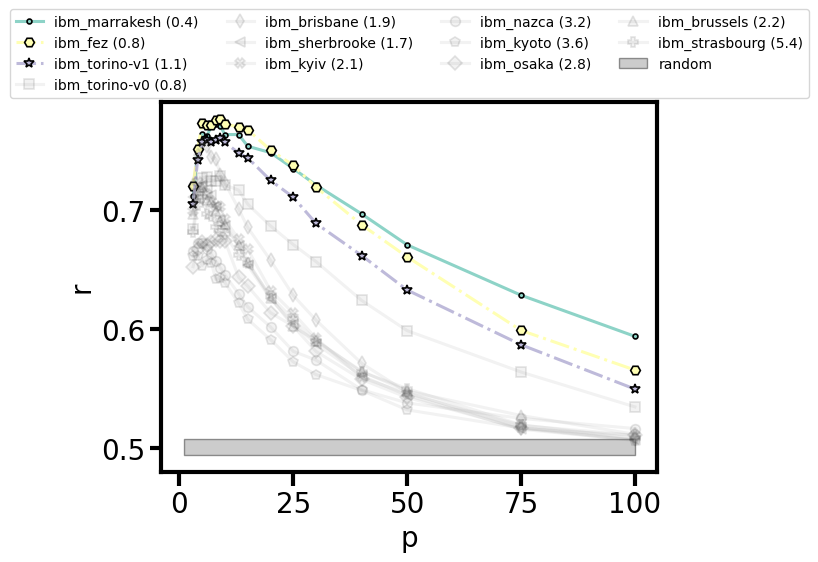

In [16]:
names = ["ibm_marrakesh","ibm_brisbane", "ibm_torino", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_fez", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}
results["ibm_torino-v1"]  = np.load(f"./Data/ibm_torino/100_1D_v1.npy", allow_pickle=True).item()
results["ibm_torino-v0"] = results["ibm_torino"]
fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
names = ["ibm_marrakesh", "ibm_fez", "ibm_torino-v1","ibm_torino-v0", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg"]
colors = plt.get_cmap("Set3")
EPLG = {"ibm_marrakesh":" (0.4)", "ibm_torino-v1":" (1.1)", "ibm_torino-v0":" (0.8)", "ibm_brisbane":" (1.9)", "ibm_sherbrooke":" (1.7)", "ibm_kyiv":" (2.1)", "ibm_osaka":" (2.8)",
         "ibm_nazca":" (3.2)", "ibm_kyoto":" (3.6)", "ibm_kyiv":" (2.1)", "ibm_fez":" (0.8)", "ibm_brussels":" (2.2)", "ibm_strasbourg":" (5.4)"}
markers = {"ibm_marrakesh":".","ibm_torino-v0":"s", "ibm_torino-v1":"*", "ibm_fez":"H", "ibm_brussels":"^", "ibm_brisbane":"d", "ibm_kyoto":"p", "ibm_nazca":"o", "ibm_kyiv":"X", "random":".", "ibm_strasbourg":"P", "H2-1":">", "ibm_sherbrooke":"<", "ibm_osaka":"D"}

n_case = 4
groups = [["ibm_marrakesh", "ibm_fez", "ibm_torino-v1"], ["ibm_torino-v0", "ibm_brisbane"],["ibm_sherbrooke", "ibm_kyiv", "ibm_brussels", "ibm_strasbourg"], ["ibm_nazca", "ibm_kyoto", "ibm_osaka"],[]][::-1]
for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    if backend_name == "ibm_fez":
        dt = 68e-3
    elif backend_name == "ibm_torino":
        dt = 86e-3
    else:
        dt = 660e-3
    # ax.plot(2*np.array(ps)*dt, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")
    ax.plot(ps, rs, label=backend_name + EPLG[backend_name], markersize=7, markeredgecolor="black", color=colors(nn) if backend_name in groups[n_case] else "gray", alpha=1 if backend_name in groups[n_case] else 0.1, linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez", "ibm_torino-v1"] else "-", marker=markers[backend_name])
    print(backend_name, max(rs))
rand_data = res_random["results"][:,1]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 100], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([0,100], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.legend(fontsize=11)
ax.set_ylabel("r")
# ax.set_xlabel(r"dt [$\mu s$]")
ax.set_xlabel("p")
# ax.set_xscale("log")
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.27), ncol=4, fontsize=10)

fig.savefig(f"./Figures/1D-Chain/comparison_100q_{n_case}.pdf", bbox_inches="tight", transparent=True)


# Repetition of the same experiment on ibm_brisbane during 2 months

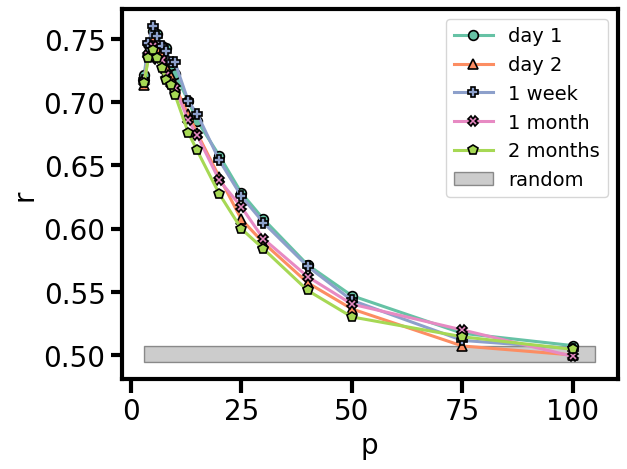

In [6]:
delta = 1
backend_name ="ibm_brisbane"
colors = plt.get_cmap("Set2")
nq = 100
case = ""
fig, ax = plt.subplots()
results = {"day 1": np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item(),
            "day 2": np.load(f"./Data/{backend_name}/{nq}_1D_day2.npy", allow_pickle=True).item(),
            "1 week": np.load(f"./Data/{backend_name}/{nq}_1D_week.npy", allow_pickle=True).item(),
            "1 month": np.load(f"./Data/{backend_name}/{nq}_1D_month.npy", allow_pickle=True).item(),
            "2 months": np.load(f"./Data/{backend_name}/{nq}_1D_2month.npy", allow_pickle=True).item()}

markers = {"day 1":"o", "day 2": "^", "1 week":"P", "1 month": "X", "2 months":"p"}
r_max = []
for nn, name in enumerate(results.keys()):
    res_nq = results[name]["postprocessing"+case]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    r_max.append(rs.max(axis=1))
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = name, marker=markers[name], markeredgecolor="black", color=colors(nn), markersize=7)

rand_data = []
for v, c in zip(results["day 1"]["random"+case]["results"][:,1],results["day 1"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(10):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([3, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")
xx = np.arange(3, 100)
a = 0.434
b = 0.381
c = 0.606
# plt.plot(xx, ((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
ax.legend()
# ax.set_xscale("log")
# fig.savefig(f"./Figures/1D/{backend_name}_differen_days{case}.pdf", bbox_inches="tight", transparent=True)

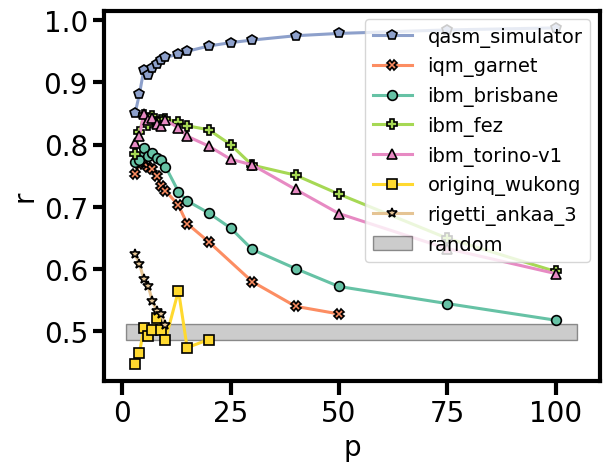

In [ ]:
nq = 19
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_brisbane", "ibm_fez"]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
results["originq_wukong"] = np.load(f"./Data/originq_wukong/{nq}_1D_1.npy", allow_pickle=True).item()
results["rigetti_ankaa_3"] = np.load(f"./Data/rigetti_ankaa_3/{nq}_1D.npy", allow_pickle=True).item()
markers = {"ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P", "originq_wukong":"s", "rigetti_ankaa_3":"*"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
color = {"ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4),"originq_wukong":colors(5),"rigetti_ankaa_3":colors(6)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.max(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.max(res_i)
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)

# Largest experiment: p=10.000 layers 

QPU: ibm_fez |  r = (np.float64(0.8076692307692307), 15)


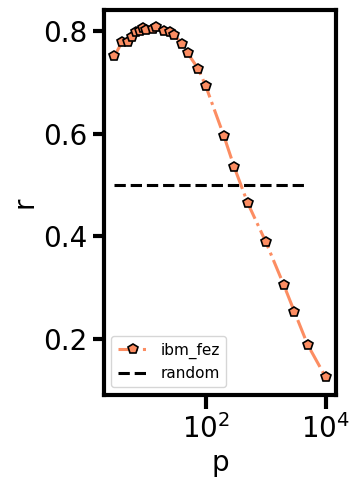

In [54]:
ibm_fez = np.load("./Data/ibm_fez/100_1Dp5000b.npy", allow_pickle=True).item()
ibm_fez_10000 = np.load("./Data/ibm_fez/100_1Dp10000.npy", allow_pickle=True).item()

color = plt.get_cmap("Set3")
fig, ax = plt.subplots(figsize=(3,5))
ps = ibm_fez["ps"]
# ax.plot(results["ps"][:-2], results["r"][10]["ideal"][:-2], color="black", linewidth=2, linestyle="--", label=r"noiseless")

colors = plt.get_cmap("Set2")
delta = 1
case = ""
prop = "r"

ps = ibm_fez["ps"] 
n2q = ps
n2q = np.array([150*i for i in ibm_fez["ps"]])
delta = 0.75
ax.plot(ps, len(ps)*[ibm_fez["random"+case][prop]], linestyle="--", color="black")

ax.plot(ps+ [10_000], [ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps] + [ibm_fez_10000["postprocessing"+case][delta][10_000][0][prop]], marker="p", label ="ibm_fez", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.")
# ax.plot(ps, [max(ibm_fez["postprocessing"+case][delta][p][0]["results"][:,1]) for p in ps], marker="p", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.", alpha=0.3)

print(f'QPU: ibm_fez |  r = {max([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps])]}')

ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend(fontsize=11, loc=3)
ax.set_ylabel("r")
ax.set_xlabel("p")
ax.set_xscale("log")
# ax.set_xticks([10,300, 5000])
# ax.set_xticklabels([10,300, 5000])

# ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/1D-Chain/fez_p5000.pdf", bbox_inches="tight", transparent=True)

In [12]:
results["iqm_emerald"] = np.load(f"./Data/iqm_emerald/{nq}_1D.npy", allow_pickle=True).item()


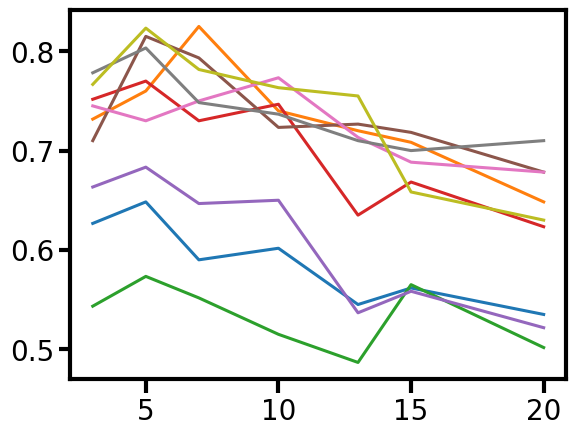

In [23]:
for i in range(9):
    plt.plot(results["iqm_emerald"]["ps"], [results["iqm_emerald"]["postprocessing"][1.0][p][i]["r"] for p in results["iqm_emerald"]["ps"]])

QPU = originq_wukong | delta = 1 | r = 0.832
QPU = qasm_simulator | delta = 1 | r = 1.0
QPU = iqm_emerald | delta = 1.0 | r = 0.838
QPU = iqm_garnet | delta = 1 | r = 0.831
QPU = ibm_fez | delta = 1 | r = 0.868
QPU = ibm_marrakesh | delta = 1 | r = 0.923
QPU = ibm_brisbane | delta = 1 | r = 0.843
QPU = rigetti_ankaa_2 | delta = 1 | r = 0.608
QPU = rigetti_ankaa_3 | delta = 1 | r = 0.604


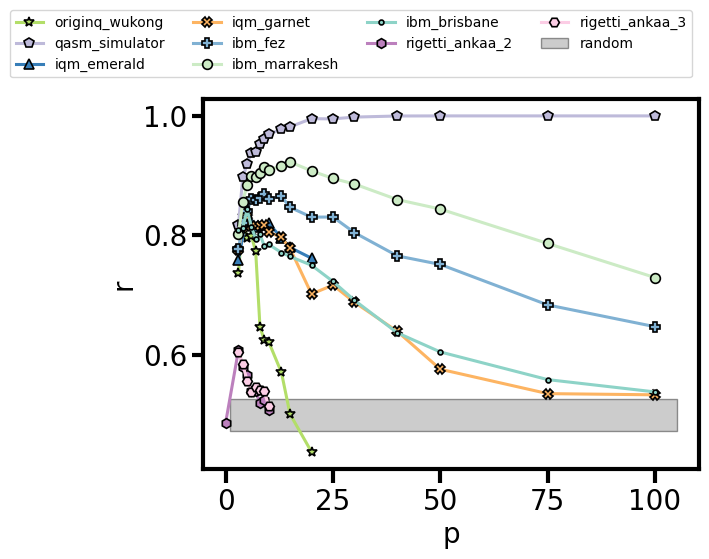

In [25]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or prob probability of success)
prop = "r"  
colors2 = plt.get_cmap("Set1")
# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_emerald","iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "rigetti_ankaa_2", "rigetti_ankaa_3"]
n_case = 0
used = [["qasm_simulator"]]
# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["originq_wukong"] = np.load(f"./Data/originq_wukong/{nq}_1D_2.npy", allow_pickle=True).item()
results["iqm_sirius"] = np.load(f"./Data/iqm_sirius/{nq}_1D_Single.npy", allow_pickle=True).item()
results["iqm_emerald"] = np.load(f"./Data/iqm_emerald/{nq}_1D_aws.npy", allow_pickle=True).item()

# Define markers for different backends
markers = {
    "ibm_marrakesh": "o", "ibm_brisbane": ".", "iqm_garnet": "X","iqm_sirius": "o", "iqm_emerald":"^",
    "qasm_simulator": "p", "ibm_torino-v1": "^", "ibm_fez": "P", "rigetti_ankaa_2": "h", "originq_wukong":"*","rigetti_ankaa_3": "H"
}

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")
color = {
    "ibm_marrakesh": colors(10), "ibm_brisbane": colors(0), "iqm_garnet": colors(5),
    "qasm_simulator": colors(2), "ibm_torino-v1": colors(3), "ibm_fez": colors(4),
    "rigetti_ankaa_2": colors(9),"originq_wukong":colors(6),"rigetti_ankaa_3": colors(7),
    "iqm_sirius":colors2(0), "iqm_emerald":colors2(1),
}

# Initialize the plot
fig, ax = plt.subplots()
backends = ["originq_wukong"] + backends
# Iterate over each backend to plot performance results
for name in backends:
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | delta = {delta} | r = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], 
            markeredgecolor="black", markersize=7)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
ax.legend(loc="center right", bbox_to_anchor=(1, 1.15), ncols=4, fontsize=10)
ax.set_ylabel(prop)
ax.set_xlabel("p")
# ax.set_xscale("log")
# ax.set_xlim(2,150)

# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", 
            bbox_inches="tight", transparent=True)


QPU = originq_wukong | delta = 1 | r = 0.832
QPU = iqm_sirius | delta = 1.0 | r = 0.685
QPU = qasm_simulator | delta = 1 | r = 1.0
QPU = iqm_garnet | delta = 1 | r = 0.831
QPU = ibm_fez | delta = 1 | r = 0.868
QPU = ibm_marrakesh | delta = 1 | r = 0.923
QPU = ibm_brisbane | delta = 1 | r = 0.843
QPU = rigetti_ankaa_2 | delta = 1 | r = 0.608
QPU = rigetti_ankaa_3 | delta = 1 | r = 0.604
QPU = iqm_emerald | delta = 1.0 | r = 0.803


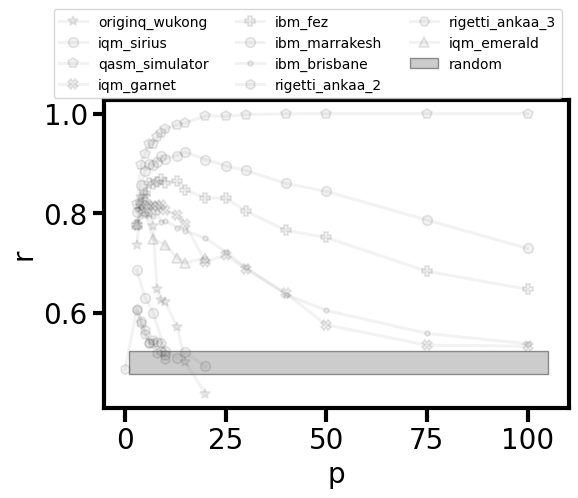

In [23]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or prob probability of success)
prop = "r"  

# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "rigetti_ankaa_2", "rigetti_ankaa_3", "iqm_emerald"]
n_case = 5
used = [[],["qasm_simulator"], ["rigetti_ankaa_2", "rigetti_ankaa_3", "iqm_sirius"], ["originq_wukong"], ["iqm_emerald", "iqm_garnet", "ibm_brisbane"], ["ibm_fez", "ibm_marrakesh"]][::-1]
# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["originq_wukong"] = np.load(f"./Data/originq_wukong/{nq}_1D_2.npy", allow_pickle=True).item()
results["iqm_sirius"] = np.load(f"./Data/iqm_sirius/{nq}_1D_single.npy", allow_pickle=True).item()

# Define markers for different backends

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")

# Initialize the plot
fig, ax = plt.subplots(figsize=(6,4))
backends = ["originq_wukong", "iqm_sirius"] + backends
# Iterate over each backend to plot performance results
for name in backends:
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | delta = {delta} | r = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name] if name in used[n_case] else "gray", alpha=1 if name in used[n_case] else 0.1, marker=markers[name], 
            markeredgecolor="black", markersize=7)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
ax.legend(loc="center right", bbox_to_anchor=(1, 1.15), ncols=3, fontsize=10)
ax.set_ylabel(prop)
ax.set_xlabel("p")
# ax.set_xscale("log")
# ax.set_xlim(2,150)

# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}_{n_case}.pdf", 
            bbox_inches="tight", transparent=True)


In [2]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or "probability" probability of success)
prop = "probability"  

# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_sirius","iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "rigetti_ankaa_2", "rigetti_ankaa_3", ]

# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["originq_wukong"] = np.load(f"./Data/originq_wukong/{nq}_1D_2.npy", allow_pickle=True).item()

# Define markers for different backends
markers = {
    "ibm_marrakesh": ".", "ibm_brisbane": "o", "iqm_garnet": "X", "iqm_sirius":"o",
    "qasm_simulator": "p", "ibm_torino-v1": "^", "ibm_fez": "P", "rigetti_ankaa_2": "h",
    "rigetti_ankaa_3":"H", "originq_wukong":"*",
}

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")
color = {
    "ibm_marrakesh": colors(10), "ibm_brisbane": colors(0), "iqm_garnet": colors(1),
    "qasm_simulator": colors(2), "ibm_torino-v1": colors(3), "ibm_fez": colors(4),
    "rigetti_ankaa_2": colors(9),"rigetti_ankaa_3": colors(7), "originq_wukong":colors(6),
    "iqm_sirius":colors(5)
}

# Initialize the plot
fig, ax = plt.subplots()

# Iterate over each backend to plot performance results
for name in results.keys():
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | {prop} = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], 
            markeredgecolor="black", markersize=7)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(np.array(rand_data[:1000]) == 1.0))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
ax.legend(loc="center right", bbox_to_anchor=(1, 0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")

# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", 
            bbox_inches="tight", transparent=True)


NameError: name 'np' is not defined

QPU = originq_wukong | delta = 1 | r = 0.836
QPU = qasm_simulator | delta = 1 | r = 1.0
QPU = iqm_garnet | delta = 1 | r = 0.831
QPU = ibm_fez | delta = 1 | r = 0.868
QPU = ibm_marrakesh | delta = 1 | r = 0.923
QPU = ibm_brisbane | delta = 1 | r = 0.843
QPU = rigetti_ankaa_2 | delta = 1 | r = 0.608
QPU = rigetti_ankaa_3 | delta = 1 | r = 0.627


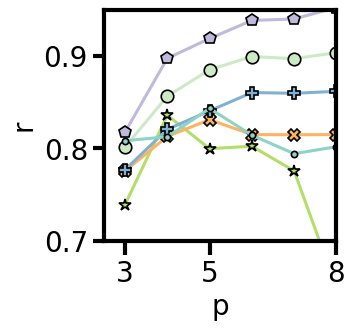

In [81]:
# Define the number of qubits in the problem
nq = 5  

# Define additional suffix for post-processing case (if any)
case = ""  # "" or "_mitig"

# Property to plot (e.g., "r" represents the approximation ratio or prob probability of success)
prop = "r"  

# List of quantum backends to compare
backends = ["qasm_simulator", "iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "rigetti_ankaa_2", "rigetti_ankaa_3"]

# Load results for each backend from stored numpy files
results = {name: np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["originq_wukong"] = np.load(f"./Data/originq_wukong/{nq}_1D_2.npy", allow_pickle=True).item()
# Define markers for different backends
markers = {
    "ibm_marrakesh": "o", "ibm_brisbane": ".", "iqm_garnet": "X",
    "qasm_simulator": "p", "ibm_torino-v1": "^", "ibm_fez": "P", "rigetti_ankaa_2": "h", "originq_wukong":"*","rigetti_ankaa_3": "H"
}

# Define colors for different backends using a color map
colors = plt.get_cmap("Set3")
color = {
    "ibm_marrakesh": colors(10), "ibm_brisbane": colors(0), "iqm_garnet": colors(5),
    "qasm_simulator": colors(2), "ibm_torino-v1": colors(3), "ibm_fez": colors(4),
    "rigetti_ankaa_2": colors(9),"originq_wukong":colors(6),"rigetti_ankaa_3": colors(7)
}

# Initialize the plot
fig, ax = plt.subplots(figsize=(3,3))
backends =  ["originq_wukong"] + backends #+ ["originq_wukong"]
# Iterate over each backend to plot performance results
for name in backends:
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | delta = {delta} | r = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], 
            markeredgecolor="black", markersize=9)

# Generate random baseline data for comparison
rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:, 1], 
                results["qasm_simulator"]["random"+case]["results"][:, 2]):
    rand_data += int(c) * [v]

# Compute statistics over 100 random samples
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))

# Convert random mean values to numpy array
rand_mean = np.array(rand_mean)

# Compute the mean and standard deviation for the random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Plot a shaded region to represent the random baseline performance
ax.fill_between([1, 105], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], 
                color="gray", alpha=0.4, edgecolor="black", label="random")

# Add labels and legend
# ax.legend(loc="center right", bbox_to_anchor=(1, 0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
ax.set_xlim(2.5,8)
ax.set_ylim(0.7,0.95)
ax.set_xticks([3,5,8])
# Save the figure as a PDF
fig.savefig(f"./Figures/1D-Chain/IQM_IBM_comparison_{nq}{case}_{prop}_zoom.pdf", 
            bbox_inches="tight", transparent=True)


QPU = iqm_garnet_old | delta = 1 | r = 0.749
QPU = iqm_garnet_new | delta = 1 | r = 0.831
QPU = iqm_garnet_single | delta = 1 | r = 0.857


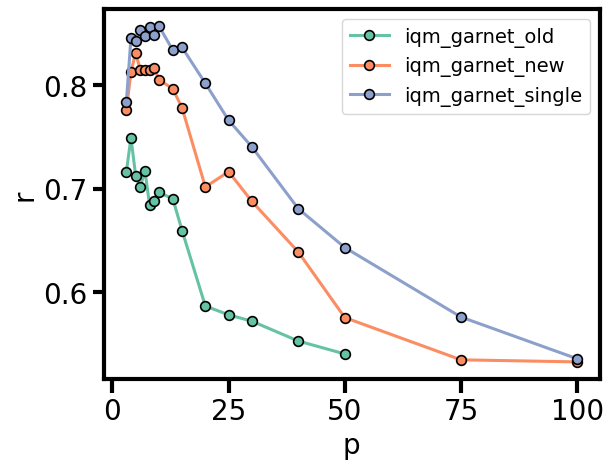

In [42]:

results = {}
results["iqm_garnet_old"] = np.load(f"./Data/iqm_garnet/5_1D_old.npy", allow_pickle=True).item()
results["iqm_garnet_new"] = np.load(f"./Data/iqm_garnet/5_1D.npy", allow_pickle=True).item()
results["iqm_garnet_single"] = np.load(f"./Data/iqm_garnet/5_1Dsingle.npy", allow_pickle=True).item()

fig, ax = plt.subplots()
colors = plt.get_cmap("Set2")
# Iterate over each backend to plot performance results
for i, name in enumerate(results.keys()):
    delta = results[name]["Deltas"][0]  # Extract delta value
    ps = results[name]["ps"]  # Extract QAOA layer depths
    best_mean = 0  # Store the best mean result

    # Iterate over all available sections of post-processed results
    for sec_i in results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]

        # Update best section based on the highest mean value
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)

    # Print the best approximation ratio for this backend
    print(f"QPU = {name} | delta = {delta} | r = {round(max(best_sec), 3)}")

    # Plot the performance of this backend
    ax.plot(results[name]["ps"], best_sec, label=name, color=colors(i), markeredgecolor="black", markersize=7, marker="o")
ax.legend()
ax.set_ylabel("r")
ax.set_xlabel("p")

fig.savefig("./Figures/1D_5q_IQM.pdf", bbox_inches="tight")

# Save Data as json file

In [39]:
import json
import numpy 
from collections import defaultdict

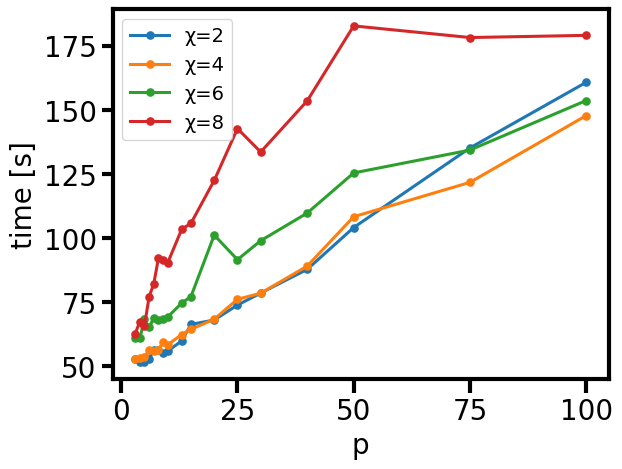

In [164]:
fig, ax = plt.subplots()
nq = 54
delta = 0.75
for X in [2,4,6,8]:
    with open(f"/Users/alejomonbar/Documents/GitHub/TensorNetworkQuantumSimulator/examples/Data/elapsed_time_{nq}_{X}_{delta}.json", "r") as file:
        time_elapsed = json.load(file)
    ax.plot(results["ps"], time_elapsed, label=f"χ={X}", marker="o")
ax.set_ylabel("time [s]")
ax.set_xlabel("p")
ax.legend()

0 0.009
0 0.0
0 0.0
0 0.0


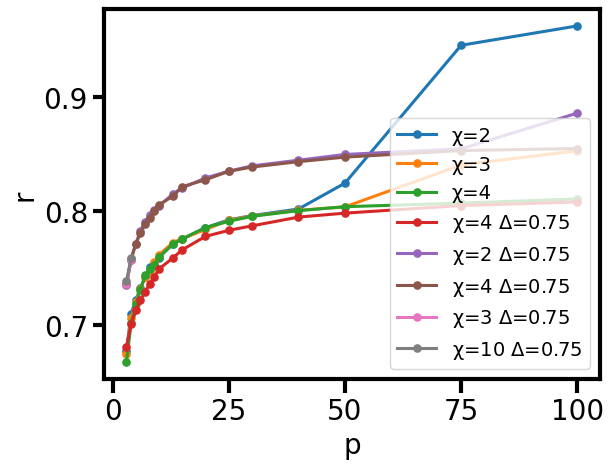

In [154]:
backend_name = "TN"  # Define the IBM backend used for execution

# Specify additional identifier for file naming:

nq = 156  # Number of qubits
sec = 0 
method="NL"
results = {}
fig, ax = plt.subplots()
delta = 1
for X in [2,3,4]:
    results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}_{delta}.npy", allow_pickle=True).item()
    print(sec, max([results["postprocessing"][1][p]["probability"] for p in results["ps"]]))
    ax.plot(results["ps"], [results["postprocessing"][1][p]["r"] for p in results["ps"]], marker="o", label=f"χ={X}")
delta = 0.75
results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}_{delta}.npy", allow_pickle=True).item()
print(sec, max([results["postprocessing"][delta][p]["probability"] for p in results["ps"]]))
ax.plot(results["ps"], [results["postprocessing"][delta][p]["r"] for p in results["ps"]], marker="o", label=rf"χ={X} $\Delta$=0.75")
extra = "_fez"
for X in [2,4,3,10]:
    results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}_{delta}{extra}.npy", allow_pickle=True).item()
    ax.plot(results["ps"], [results["postprocessing"][delta][p]["r"] for p in results["ps"]], marker="o", label=rf"χ={X} $\Delta$=0.75")
ax.set_xlabel("p")
ax.set_ylabel("r")
ax.legend()



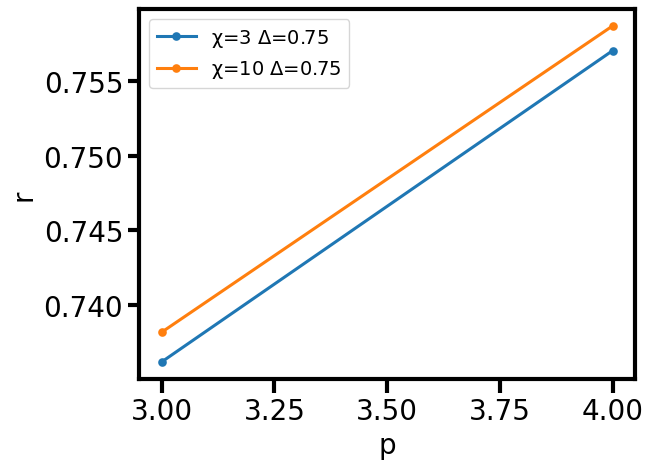

In [151]:
fig, ax = plt.subplots()

extra = "_fez"
for X in [3,10]:
    results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}_{delta}{extra}.npy", allow_pickle=True).item()
    ax.plot(results["ps"], [results["postprocessing"][delta][p]["r"] for p in results["ps"]], marker="o", label=rf"χ={X} $\Delta$=0.75")
ax.set_xlabel("p")
ax.set_ylabel("r")
ax.legend()

0 0.0
0 0.0
0 0.0


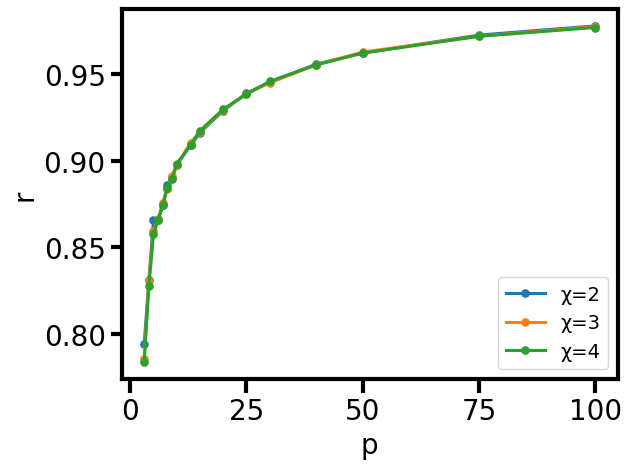

In [117]:
backend_name = "TN"  # Define the IBM backend used for execution

# Specify additional identifier for file naming:
extra = "_4"  # No extra identifier

nq = 100  # Number of qubits
sec = 0 
method="1D"
results = {}
fig, ax = plt.subplots()

for X in [2,3,4]:
    results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}.npy", allow_pickle=True).item()
    print(sec, max([results["postprocessing"][1][p][sec]["probability"] for p in results["ps"]]))
    ax.plot(results["ps"], [results["postprocessing"][1][p][sec]["r"] for p in results["ps"]], marker="o", label=f"χ={X}")
ax.set_xlabel("p")
ax.set_ylabel("r")
ax.legend()



0.65
0.856
0.901
0.819


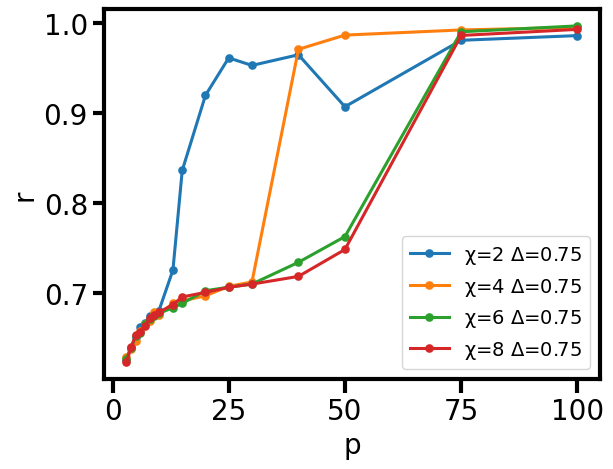

In [ ]:
fig, ax = plt.subplots()
nq = 54
backend_name = "TN"
extra = ""
for X in [2,4,6,8]:
    results = np.load(f"./Data/{backend_name}/{nq}_{method}_{X}_{delta}{extra}.npy", allow_pickle=True).item()
    print(max([results["postprocessing"][delta][p]["probability"] for p in results["ps"]]))
    ax.plot(results["ps"], [results["postprocessing"][delta][p]["r"] for p in results["ps"]], marker="o", label=rf"χ={X} $\Delta$=0.75")
ax.set_xlabel("p")
ax.set_ylabel("r")
ax.legend()